## Setting up

In [1]:
#Import packages

import numpy as np
import pandas as pd 
import glob
import os
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score


path = r'C:\Users\leyen\OneDrive\Desktop\School Works\Dr.Soibam Research\Summer2021\18states'
os.chdir(path)
myFiles = glob.glob('*.txt')

In [2]:
cell = []        
cells = []
for i in range(0, len(myFiles)):
    if i % 2 == 0:
        cell.append(myFiles[i].replace('.txt.boundary.bed.18core.states.matrix.txt',''))
        cells.append(myFiles[i].replace('.txt.boundary.bed.18core.states.matrix.txt',''))
    if i % 2 == 1:
        cells.append(myFiles[i].replace('.txt.boundary.bed.random.18core.states.matrix.txt',''))


In [3]:
cell

['A549_raw-rep1_TADs',
 'AdrenalGland_Donor-AD2-raw_TADs',
 'Aorta_STL002_Leung2015-raw_TADs',
 'H1-ESC_Dixon2015-raw_TADs',
 'H1-MES_Dixon2015-raw_TADs',
 'H1-MSC_Dixon2015-raw_TADs',
 'H1-NPC_Dixon2015-raw_TADs',
 'H1-TRO_Dixon2015-raw_TADs',
 'HMEC_Lieberman-raw_TADs',
 'HUVEC_Lieberman-raw_TADs',
 'IMR90_Lieberman-raw_TADs',
 'K562_Lieberman-raw_TADs',
 'Liver_STL011_Leung2015-raw_TADs',
 'Lung_Donor-LG1-raw_TADs',
 'Muscle_Psoas_Donor-PO1-raw_TADs',
 'NHEK_Lieberman-raw_TADs',
 'Pancreas_Donor-PA2-raw_TADs',
 'Spleen_Donor-PX1-raw_TADs',
 'Thymus_STL001_Leung2015-raw_TADs',
 'VentricleLeft_STL003_Leung2015-raw_TADs',
 'VentricleRight_Donor-RV3-raw_TADs']

In [4]:
name = ['A549_raw-rep1_TADs',
 'AdrenalGland_Donor-AD2-raw_TADs',
 'Aorta_STL002_Leung2015-raw_TADs',
 'H1-ESC_Dixon2015-raw_TADs',
 'H1-MES_Dixon2015-raw_TADs',
 'H1-MSC_Dixon2015-raw_TADs',
 'H1-NPC_Dixon2015-raw_TADs',
 'H1-TRO_Dixon2015-raw_TADs',
 'HMEC_Lieberman-raw_TADs',
 'HUVEC_Lieberman-raw_TADs',
 'IMR90_Lieberman-raw_TADs',
 'K562_Lieberman-raw_TADs',
 'Liver_STL011_Leung2015-raw_TADs',
 'Lung_Donor-LG1-raw_TADs',
 'Muscle_Psoas_Donor-PO1-raw_TADs',
 'NHEK_Lieberman-raw_TADs',
 'Pancreas_Donor-PA2-raw_TADs',
 'Spleen_Donor-PX1-raw_TADs',
 'Thymus_STL001_Leung2015-raw_TADs',
 'VentricleLeft_STL003_Leung2015-raw_TADs',
 'VentricleRight_Donor-RV3-raw_TADs']

In [5]:
cell_nonRand = []        
cell_Rand = []
for i in range(0, len(myFiles)):
    if i % 2 == 0:
        cell_nonRand.append(myFiles[i])
    if i % 2 == 1:
        cell_Rand.append(myFiles[i])

In [6]:
for i in range(0, 21):
    nonRand = pd.read_csv(path+'\\'+cell_nonRand[i],delimiter = "\t", header = None)
    Rand = pd.read_csv(path+'\\'+cell_Rand[i],delimiter = "\t", header = None)
    nonRand = nonRand.iloc[:,3:]
    Rand = Rand.iloc[:,3:]
    nonRand.columns = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
    Rand.columns = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
    nonRand['label'] = 1
    Rand['label'] = 0
    cell[i] = pd.concat([nonRand, Rand])

In [7]:
cell[0]

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,label
0,0.000000,0.029999,0.000000,0.005,0.000000,0.114997,0.000000,0.000000,0.000000,0.0,0.079998,0.000000,0.000,0.000000,0.000,0.000000,0.000000,0.770006,1
1,0.025024,0.000000,0.024999,0.010,0.059999,0.799980,0.000000,0.000000,0.000000,0.0,0.079998,0.000000,0.000,0.000000,0.000,0.000000,0.000000,0.000000,1
2,0.000000,0.000000,0.005000,0.015,0.254994,0.220020,0.015000,0.000000,0.049999,0.0,0.159996,0.000000,0.000,0.000000,0.000,0.000000,0.000000,0.279993,1
3,0.084998,0.029999,0.000000,0.005,0.079998,0.050024,0.229994,0.044999,0.000000,0.0,0.000000,0.000000,0.000,0.000000,0.000,0.000000,0.000000,0.474988,1
4,0.000000,0.000000,0.000000,0.000,0.000000,0.025024,0.000000,0.000000,0.000000,0.0,0.000000,0.034999,0.005,0.000000,0.000,0.000000,0.000000,0.934977,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3008,0.000000,0.015000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000,0.034999,0.000,0.424989,0.525012,0.000000,0
3009,0.024999,0.010000,0.000000,0.000,0.000000,0.020000,0.000000,0.000000,0.000000,0.0,0.020000,0.000000,0.000,0.000000,0.005,0.015000,0.905002,0.000000,0
3010,0.024999,0.020000,0.010000,0.000,0.000000,0.152146,0.000000,0.000000,0.000000,0.0,0.034999,0.000000,0.000,0.000000,0.000,0.000000,0.000000,0.757856,0
3011,0.000000,0.000000,0.024999,0.000,0.054999,0.215020,0.094998,0.039999,0.010000,0.0,0.214995,0.000000,0.000,0.000000,0.000,0.000000,0.000000,0.344991,0


In [8]:
for i in range(0, 21):
    
    #Indicate features and class label
    x = cell[i].iloc[:,0:-1].apply(pd.to_numeric,errors='coerce')
    y = cell[i]["label"].astype('int')
    
    #Split data into training (80%) and testing (testing)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=12)
    
    #Scale the features to center zero mean and unit standard deviation
    ss = StandardScaler()
    x_train = ss.fit_transform(x_train)
    x_test = ss.transform(x_test)
    
    #Build the random forest model
    model = RandomForestClassifier()
    model.fit(x_train, y_train)
    
    #Check y prediction
    y_pred = model.predict(x_test)
    
    #Check report on confusion_matrix and accuracy score
    print(name[i])
    print(confusion_matrix(y_test, y_pred))
    print(accuracy_score(y_test, y_pred))
    print()

A549_raw-rep1_TADs
[[416 206]
 [234 350]]
0.6351575456053068

AdrenalGland_Donor-AD2-raw_TADs
[[381 228]
 [237 326]]
0.6032423208191127

Aorta_STL002_Leung2015-raw_TADs
[[328 213]
 [232 310]]
0.5891043397968606

H1-ESC_Dixon2015-raw_TADs
[[510 263]
 [315 453]]
0.6249188838416613

H1-MES_Dixon2015-raw_TADs
[[509 275]
 [307 459]]
0.6245161290322581

H1-MSC_Dixon2015-raw_TADs
[[444 279]
 [252 433]]
0.6228693181818182

H1-NPC_Dixon2015-raw_TADs
[[408 221]
 [237 314]]
0.611864406779661

H1-TRO_Dixon2015-raw_TADs
[[468 245]
 [249 451]]
0.6503892427459307

HMEC_Lieberman-raw_TADs
[[719 302]
 [399 588]]
0.6508964143426295

HUVEC_Lieberman-raw_TADs
[[578 317]
 [317 606]]
0.6512651265126512

IMR90_Lieberman-raw_TADs
[[621 322]
 [283 644]]
0.6764705882352942

K562_Lieberman-raw_TADs
[[582 275]
 [331 520]]
0.6451990632318502

Liver_STL011_Leung2015-raw_TADs
[[241 165]
 [184 244]]
0.5815347721822542

Lung_Donor-LG1-raw_TADs
[[384 244]
 [248 330]]
0.5920398009950248

Muscle_Psoas_Donor-PO1-raw_TADs


In [9]:
#Indicate features and class label
x = cell[0].iloc[:,0:-1].apply(pd.to_numeric,errors='coerce')
y = cell[0]["label"].astype('int')

In [10]:
#Split data into training (80%) and testing (testing)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=12)

In [11]:
#Scale the features to center zero mean and unit standard deviation
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

## Classic random forest model

In [12]:
#Build the random forest model
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [13]:
#Check y prediction
y_pred = model.predict(x_test)

y_pred

array([0, 0, 1, ..., 1, 1, 1])

In [14]:
#Check report on confusion_matrix and accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[411 211]
 [223 361]]
0.6401326699834162


## Random forest model with 10-fold cross validation

In [15]:
#Using 10-fold cross validation on the random forest model
from sklearn.model_selection import cross_val_score
train_score = cross_val_score(model, x_train, y_train, scoring = 'accuracy', cv=10)
test_score = cross_val_score(model, x_test, y_test, scoring = 'accuracy', cv=10)

print(train_score)
print(test_score)

[0.63485477 0.63900415 0.65352697 0.63692946 0.62448133 0.64107884
 0.63692946 0.60580913 0.6473029  0.65767635]
[0.61983471 0.68595041 0.53719008 0.6446281  0.66115702 0.57024793
 0.55833333 0.63333333 0.59166667 0.61666667]


## Further tuning the model’s hyperparameters with GridSearchCV

In [16]:
model_param = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

In [17]:
# set up grid search meta-estimator
clf = GridSearchCV(model, model_param, scoring='accuracy', cv=10)

# train the grid search meta-estimator to find the best model
mod = clf.fit(x, y)

In [18]:
#Print out the the best parameter and score
params = clf.best_params_
print("Best Parameters: ", params)

score = clf.best_score_
print("Best Score: ", score)

Best Parameters:  {'bootstrap': True, 'criterion': 'gini', 'n_estimators': 300}
Best Score:  0.6354153925830428


## Accuracy, AUC (area under the curve) score, Precision, Recall, F1 score

In [19]:
#Accuracy, Precision, Recall, F1 score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))

Accuracy:  0.6401326699834162
Precision:  0.6311188811188811
Recall:  0.6181506849315068
F1 score:  0.6245674740484429


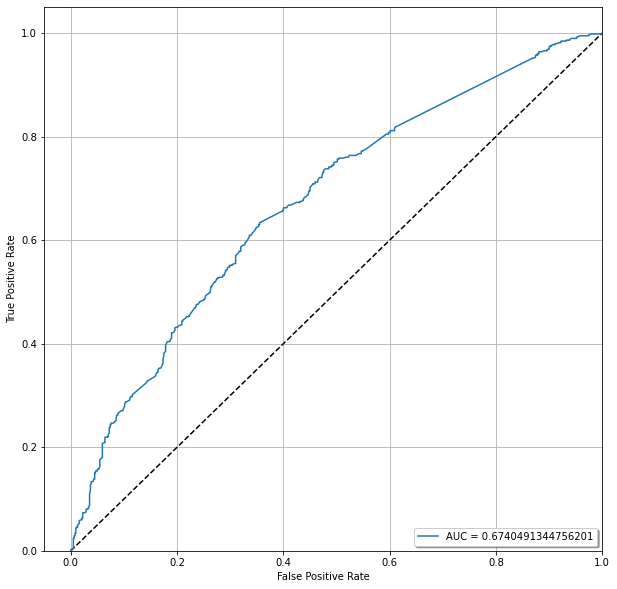

In [20]:
#AUC

from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# overall accuracy
acc = clf.score(x_test,y_test)

# get roc/auc info
y_score = clf.predict_proba(x_test)[:,1]
fpr = dict()
tpr = dict()
fpr, tpr, _ = roc_curve(y_test, y_score)

roc_auc = dict()
roc_auc = auc(fpr, tpr)

# make the plot
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.plot(fpr, tpr, label='AUC = {0}'.format(roc_auc))        
plt.legend(loc="lower right", shadow=True, fancybox =True) 
plt.show()

## Save the trained model to a file

In [21]:
# import pickle 
# filename = 'rao_huvec.pickle'
# pickle.dump(model, open(filename, 'wb'))